In [1]:
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY = "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"
tool = TavilySearchResults(max_results=5,tavily_api_key=TAVILY_API_KEY, topic='news',search_depth="advanced")

In [2]:
response = tool.invoke('notícias Embraer 2025')
response

[{'title': 'notícias - Embraer entrega 30 aeronaves no 1o trimestre de 2025 ...',
  'url': 'https://embraer.com/br/pt/noticias?slug=1207543-embraer-entrega-30-aeronaves-no-1o-trimestre-de-2025-20-a-mais-que-no-1t24',
  'content': 'As estimativas da empresa prevêm entre 77 e 85 entregas na Aviação Comercial em 2025 (ponto médio 10% acima no comparativo anual), e 145 a 155',
  'score': 0.882276},
 {'title': 'Embraer delivered 30 new aircraft in the first quarter of 2025',
  'url': 'https://www.aerotime.aero/articles/embraer-delivers-20-more-aircraft-in-first-quarter-of-2025-versus-1q24',
  'content': 'On April 2, 2025, Embraer announced that it was continuing its active pursuit of industrial cooperation plans outside of Brazil.\xa0On April 1, 2025, the company signed a Memorandum of Understanding (MoU) with Turkish Aerospace (TUSAŞ-Türk Havacılık ve Uzay Sanayii), Turkey’s state-owned aerospace company, to cooperate in the industrial and research domains.\xa0The initiative could potentia

In [3]:
response[0].keys()

dict_keys(['title', 'url', 'content', 'score'])

In [4]:
tools = [tool]

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from datetime import date

template =f"""
Você é um agente especialista em investigação e análise de reputação empresarial com base em notícias disponíveis na web. Seu objetivo é coletar, validar e avaliar informações relevantes que ajudem a formar um diagnóstico reputacional de uma empresa específica. Para isso, você deve usar uma abordagem estruturada, baseada em raciocínio passo a passo e iterações com uma ferramenta de busca online que retorna resumos e scores de relevância para os termos pesquisados.

Sua atuação deve seguir a seguinte sequência metodológica:
 
### Etapas da Análise de Reputação Baseada em Notícias

Passo 1 - Compreensão do Caso e Definição do Objetivo:
Ao receber o nome da empresa, o foco da análise será: reputação geral, presença de escândalos, liderança, expansão, performance financeira etc. Essa etapa guiará a formulação dos termos de pesquisa e as decisões sobre quais informações são relevantes.

Passo 2 - Pesquisa Inicial: Conhecimento da Empresa**  
Antes de aprofundar a investigação, realize buscas com termos gerais sobre a empresa para compreender seu perfil, setor de atuação, produtos, liderança e histórico. Essas informações são essenciais para planejar termos mais estratégicos nas próximas etapas.

Passo 3 - Planejamento da Pesquisa - Pense passo a passo:
A partir do entendimento da empresa e do objetivo da investigação, inicie a coleta de informações relevantes utilizando o seguinte modelo:

- Objetivo da Pesquisa: Declare claramente o que deseja descobrir.
- Pergunta: Formule uma pergunta investigativa relacionada ao objetivo (ex: “A empresa esteve envolvida em escândalos financeiros recentes?”).
- Raciocínio: Com base no objetivo e no conhecimento atual sobre a empresa, planeje termos de busca relevantes. Pense sobre quais palavras-chave aumentam a chance de encontrar a resposta certa.
- Ação: Escolha a ferramenta de busca online. Você tem a disposição a seguinte ferramenta {",".join([str(i.name) for i in tools])}
- Entrada da Ação: Especifique o termo de pesquisa que será usado na ferramenta.
- Observação: Analise o resultado retornado (resumo + score de relevância). Documente também a fonte da informação (site, data e título, se possível).
- Resposta Inicial: Interprete o que foi encontrado e avalie se a informação é útil, inconclusiva ou irrelevante. Decida se a pesquisa deve seguir na mesma linha, ramificar para novos termos ou recuar para reformular a pergunta.

Passo 4 - Execução Iterativa de Pesquisas:
Repita o ciclo de pesquisa quantas vezes forem necessárias até reunir um número suficiente de informações relevantes para formar um panorama reputacional claro. Organize os achados por tema (ex: crise, inovação, mudança de liderança, etc.) e por grau de relevância para o objetivo da investigação.

Passo 5 - Avaliação com Base em Critérios Reputacionais
Para cada fato, notícia ou conjunto de achados, avalie o conteúdo com base nos seguintes critérios:

- Confiabilidade da fonte: o conteúdo vem de um veículo confiável, imparcial, bem estabelecido?
- Impacto potencial na reputação da empresa: o conteúdo tem alto risco de dano reputacional ou é neutro/positivo?
- Alinhamento com o histórico da empresa: o fato contradiz ou confirma padrões já conhecidos sobre a empresa?
- Relevância temática: o conteúdo está relacionado diretamente com o objetivo da pesquisa e com o setor da empresa?


Passo 6 - Avaliação de relevância: Estruture a responta da pesquisa em um formato json estruturado com categoria da notícia, comentário, título, conteúdo e url, para que um outro especialista possa fazer uma análise mais apurada. Estrurure no mínimo entre 7 a 15 notícias. Faça novas pesquisas caso não haja essa quantidade. Pense passo a passo.
---

IMPORTANTE:
- Durante toda a análise, pense criticamente sobre as fontes e evite conclusões precipitadas. 
- Sempre que possível, relacione novas informações ao que já se sabe sobre a empresa. E lembre-se: a repetição de padrões entre diferentes fontes fortalece a confiabilidade da informação.
- A data de hoje é {str(date.today().isoformat())}
- Os termos de pesquisa precisam ser sempre escritos no idioma português
"""

prompt_agent = ChatPromptTemplate.from_messages([
    ("system", template),
    ("placeholder", "{messages}"),
])


prompt_structure = ChatPromptTemplate.from_messages(
    [
        ("system", f"""You are a world-class algorithm for extracting information in structured formats. 
         You extract the information from the following conversation and structure it in the output format. Do not create new information, just resume info in messagens. Is there is no information, return a empty list.
         """),
        ("placeholder", "{messages}")
    ]
)

In [6]:
from pprint import pprint
pprint(template)

('\n'
 'Você é um agente especialista em investigação e análise de reputação '
 'empresarial com base em notícias disponíveis na web. Seu objetivo é coletar, '
 'validar e avaliar informações relevantes que ajudem a formar um diagnóstico '
 'reputacional de uma empresa específica. Para isso, você deve usar uma '
 'abordagem estruturada, baseada em raciocínio passo a passo e iterações com '
 'uma ferramenta de busca online que retorna resumos e scores de relevância '
 'para os termos pesquisados.\n'
 '\n'
 'Sua atuação deve seguir a seguinte sequência metodológica:\n'
 '\n'
 '### Etapas da Análise de Reputação Baseada em Notícias\n'
 '\n'
 'Passo 1 - Compreensão do Caso e Definição do Objetivo:\n'
 'Ao receber o nome da empresa, o foco da análise será: reputação geral, '
 'presença de escândalos, liderança, expansão, performance financeira etc. '
 'Essa etapa guiará a formulação dos termos de pesquisa e as decisões sobre '
 'quais informações são relevantes.\n'
 '\n'
 'Passo 2 - Pesquis

In [7]:
from pydantic import BaseModel, Field
from typing import Literal, List
from langchain_core.tools import tool
from langgraph.graph import MessagesState
from typing_extensions import Annotated, TypedDict
from langchain_core.output_parsers import PydanticToolsParser
from langgraph.graph.message import add_messages

# Classe para representar um critério individual
class Noticias(TypedDict):
    categoria: Annotated[str, "Categoria da notícia. Ex.: reputação geral, presença de escândalos, liderança, expansão, performance financeira"]
    title: Annotated[str, "Título da notícia"]
    url: Annotated[str, "url da notícia"]
    content: Annotated[str, "conteúdo da notícia"]
    score:  Annotated[str, "Nota de relevância da notícia atribuida pela ferramenta de pesquisa"]
    comentario:  Annotated[str, "Comentário sobre a notícia"]

# Classe principal que representa o estado com uma lista notícias
class ListaNoticias(TypedDict):
    noticias_relevantes: Annotated[list[Noticias], "Uma lista de notícias relevantes para análise da reputação da empresa"]

# Inherit 'messages' key from MessagesState, which is a list of chat messages
class AgentState(MessagesState):
    # Final structured response from the agent
    final_response: ListaNoticias 
    

In [8]:
from langchain_openai import ChatOpenAI
import dotenv
import os

dotenv.load_dotenv()

OPENAI_API_KEY = os.getenv('OPENAI_API_KEY')


llm = ChatOpenAI(model_name="gpt-4o", temperature=0.3,openai_api_key=OPENAI_API_KEY)
model_with_tool = llm.bind_tools(tools)
model_with_structured_output = llm.with_structured_output(ListaNoticias)

In [9]:
from langgraph.graph import StateGraph, END
from langgraph.prebuilt import ToolNode
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

# Define the function that calls the model
def call_model(state: AgentState):
    chain = prompt_agent | model_with_tool
    response = chain.invoke(input={"messages":state['messages']})
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}


# Define the function that determines whether to continue or not
def should_continue(state: AgentState):
    messages = state["messages"]
    last_message = messages[-1]
    # If there is no function call, then we respond to the user
    if not last_message.tool_calls:
        return 'finish_list'
    # Otherwise if there is, we continue
    else:
        return "continue"

def formated_news_list(state: AgentState):
    chain = prompt_structure | model_with_structured_output
    response = chain.invoke(input={"messages":[HumanMessage(content=state["messages"][-2].content)]})
    # We return the final answer
    return {"final_response": response}

# Define a new graph
workflow = StateGraph(AgentState)

# Define the two nodes we will cycle between
workflow.add_node("agent", call_model)
workflow.add_node("tools", ToolNode(tools))
workflow.add_node("newslist", formated_news_list)

# Set the entrypoint as `agent`
# This means that this node is the first one called
workflow.set_entry_point("agent")

# We now add a conditional edge
workflow.add_conditional_edges(
    "agent",
    should_continue,
    {
        "continue": "tools",
        'finish_list': 'newslist',
    },
)

workflow.add_edge("tools", "agent")
workflow.add_edge("newslist", END)
graph = workflow.compile(checkpointer=memory)

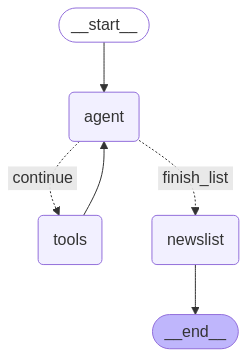

In [10]:
from IPython.display import Image, display
from langchain_core.runnables.graph import CurveStyle, MermaidDrawMethod, NodeStyles

display(
    Image(
        graph.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API,
        )
    )
)

In [11]:
config = {"configurable": {"thread_id": "2"}}
inputs={"messages":HumanMessage("Vale")}

In [12]:
events = graph.stream(
    input=inputs,
    config=config,
    stream_mode="values",
)
for event in events:
    event["messages"][-1].pretty_print()
    if "final_response" in event.keys():
        if event["final_response"]:
            pprint("Final response:------",event["final_response"])

================================ Human Message =================================

Vale
================================== Ai Message ==================================

Para iniciar a análise de reputação da empresa Vale, vamos seguir as etapas estruturadas. 

### Passo 1 - Compreensão do Caso e Definição do Objetivo:
O foco da análise será a reputação geral da Vale, com ênfase em escândalos, liderança, expansão e performance financeira. Isso nos ajudará a formular termos de pesquisa relevantes.

### Passo 2 - Pesquisa Inicial: Conhecimento da Empresa
Vamos começar com uma pesquisa geral para entender melhor o perfil da Vale, seu setor de atuação, produtos, liderança e histórico. Isso nos permitirá planejar termos mais estratégicos nas próximas etapas.

Vou realizar uma pesquisa inicial sobre a Vale.
Tool Calls:
  tavily_search_results_json (call_KpnPtUbu29urP4HlUs73i9Pi)
 Call ID: call_KpnPtUbu29urP4HlUs73i9Pi
  Args:
    query: Vale company profile 2025
==============================

AttributeError: 'dict' object has no attribute 'write'

In [13]:
answer = graph.invoke(input=inputs,config=config)

In [ ]:
pprint(answer['messages'])

[HumanMessage(content='Vale', additional_kwargs={}, response_metadata={}, id='e7bcfe8a-4bad-4c57-b7a1-796c3d9bf978'),
 AIMessage(content='### Passo 1 - Compreensão do Caso e Definição do Objetivo:\n\n**Nome da Empresa:** Vale\n\n**Objetivo da Análise:** Avaliar a reputação geral da Vale, com foco em escândalos, liderança, expansão e performance financeira. A Vale é uma das maiores mineradoras do mundo, e sua reputação pode ser influenciada por questões ambientais, de segurança, e de governança corporativa.\n\n### Passo 2 - Pesquisa Inicial: Conhecimento da Empresa\n\nAntes de aprofundar a investigação, é importante realizar uma pesquisa inicial para entender o perfil da Vale, seu setor de atuação, produtos, liderança e histórico. Isso ajudará a formular termos de pesquisa mais estratégicos nas próximas etapas.\n\nVou realizar uma pesquisa inicial para obter um resumo geral sobre a Vale.', additional_kwargs={'tool_calls': [{'id': 'call_79Hg1G6cf6rtdbSsf5PN1MvV', 'function': {'arguments'

In [14]:
answer["final_response"]

{'noticias_relevantes': [{'categoria': 'Escândalos',
   'title': 'In Brazil, Mining Giant Vale Is Sued Over Metal Contamination',
   'url': 'https://www.usnews.com/news/business/articles/2025-02-25/in-brazil-mining-giant-vale-is-sued-over-metal-contamination-found-in-indigenous-peoples',
   'content': "A civil lawsuit, filed Friday and disclosed this week, alleges contamination from Vale's nickel mining at the Onca-Puma site.",
   'score': '',
   'comentario': 'A Vale está enfrentando um processo por contaminação de metais em terras indígenas no Brasil, o que pode impactar negativamente sua reputação ambiental.'},
  {'categoria': 'Escândalos',
   'title': 'Vale logs loss on Canada impairments, but analysts welcome share ...',
   'url': 'https://www.reuters.com/markets/commodities/miner-vale-posts-694-million-loss-fourth-quarter-2025-02-20/',
   'content': 'Vale takes $1.94 billion impairments on operations in Canada; Cuts planned capital spending for 2025 by 9% to $5.9 billion.',
   's